<a href="https://colab.research.google.com/github/Kavipriyajk/Heart-Failure-Prediction-analysis/blob/main/DV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('dataset.csv')
print('Data read successfully')
data.head()  #This function returns the first n rows for the object based on position

Saving dataset.csv to dataset.csv
Data read successfully


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#checking missing data 

data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
age_group                   7
dtype: int64

In [ ]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.describe(include='all')  #The describe() method computes and displays summary statistics for a Python dataframe

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.corr()   #corr() is used to find the pairwise correlation of all columns in the dataframe

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


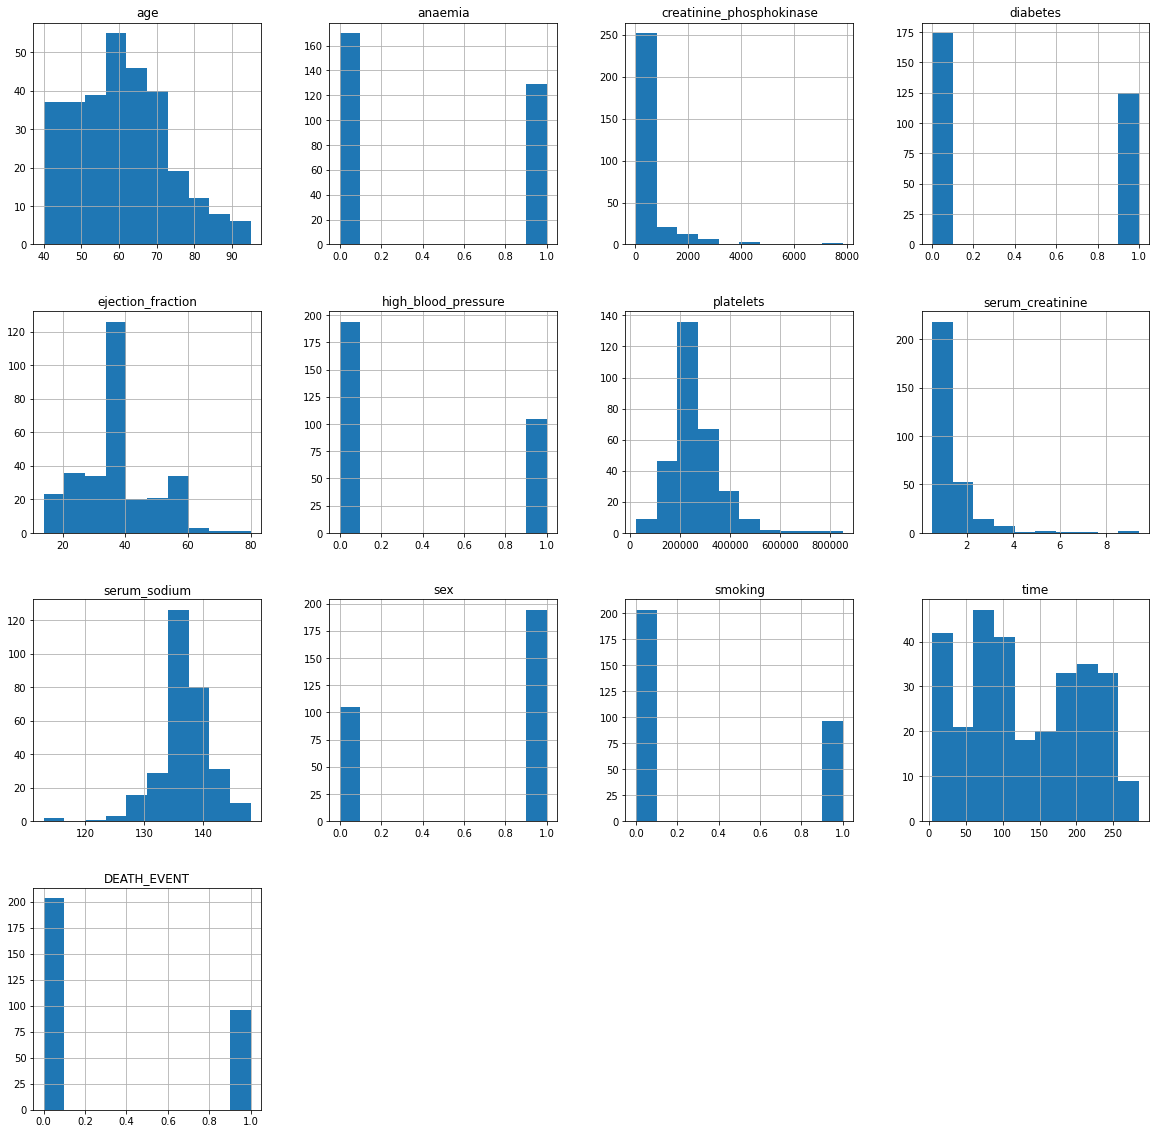

In [ ]:
import matplotlib.pyplot as plt
data.hist(figsize = (20,20))

plt.show()


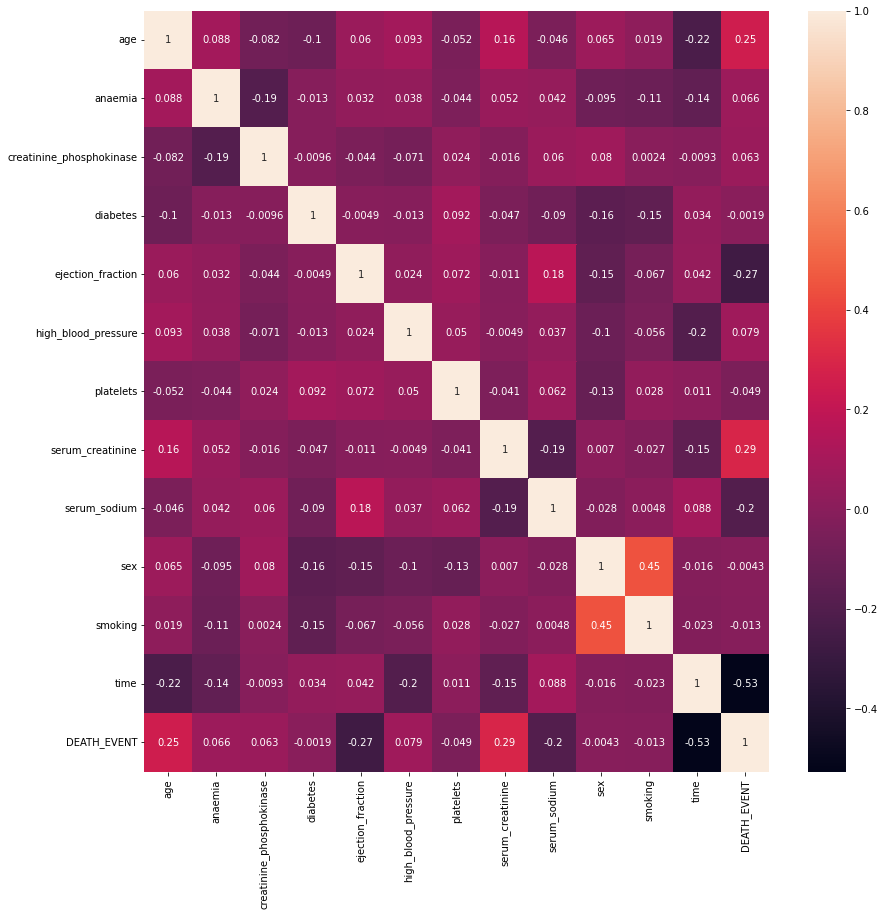

In [ ]:
#heatmap for understanding the correlation between features 
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


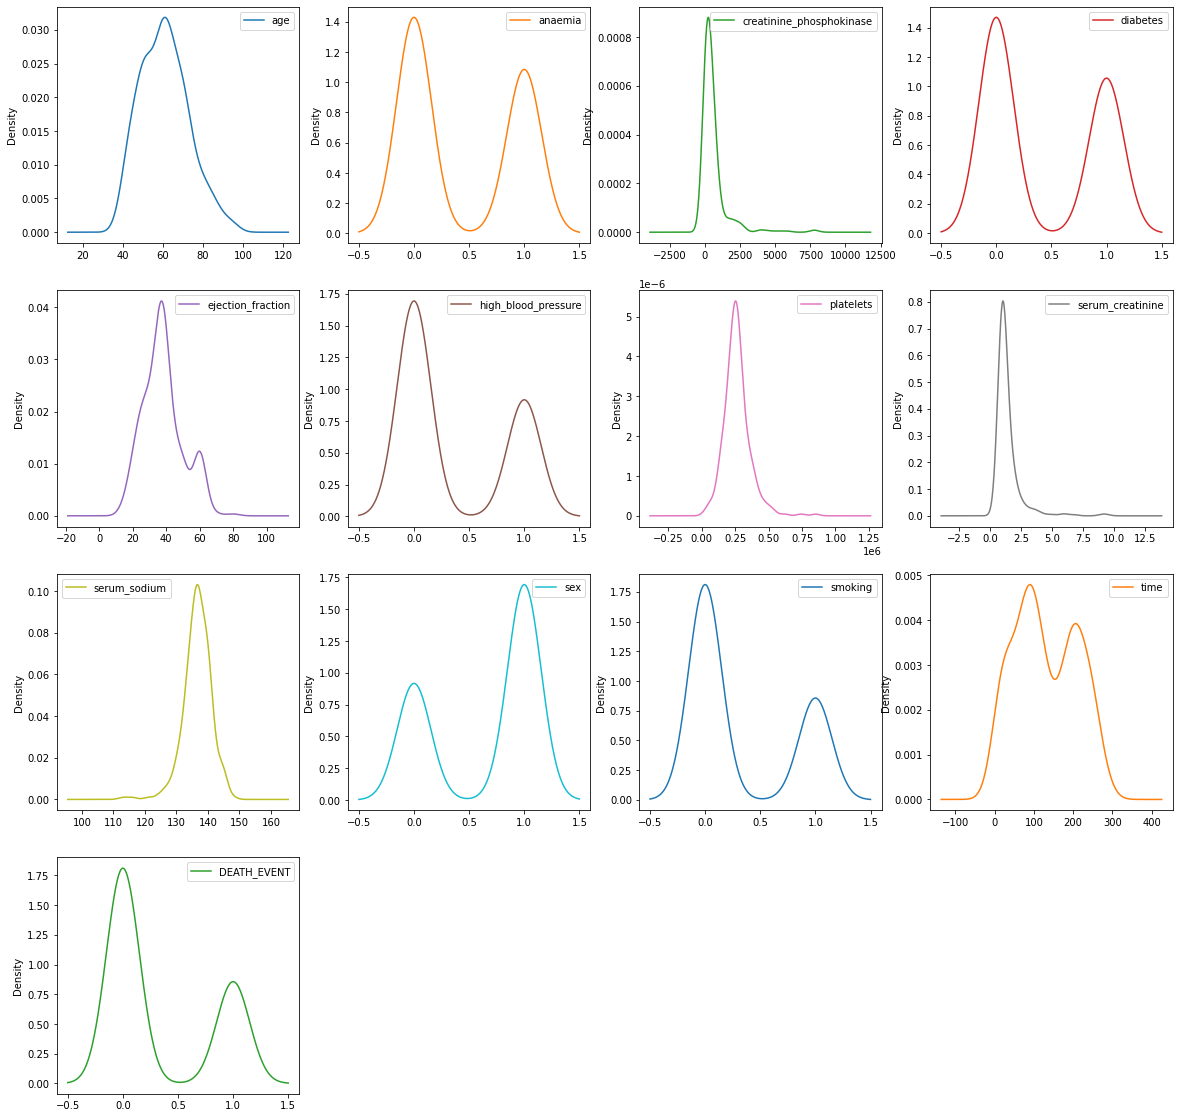

In [ ]:
#checking the distribution of the dataset we will plot the density chart of each feature.

fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


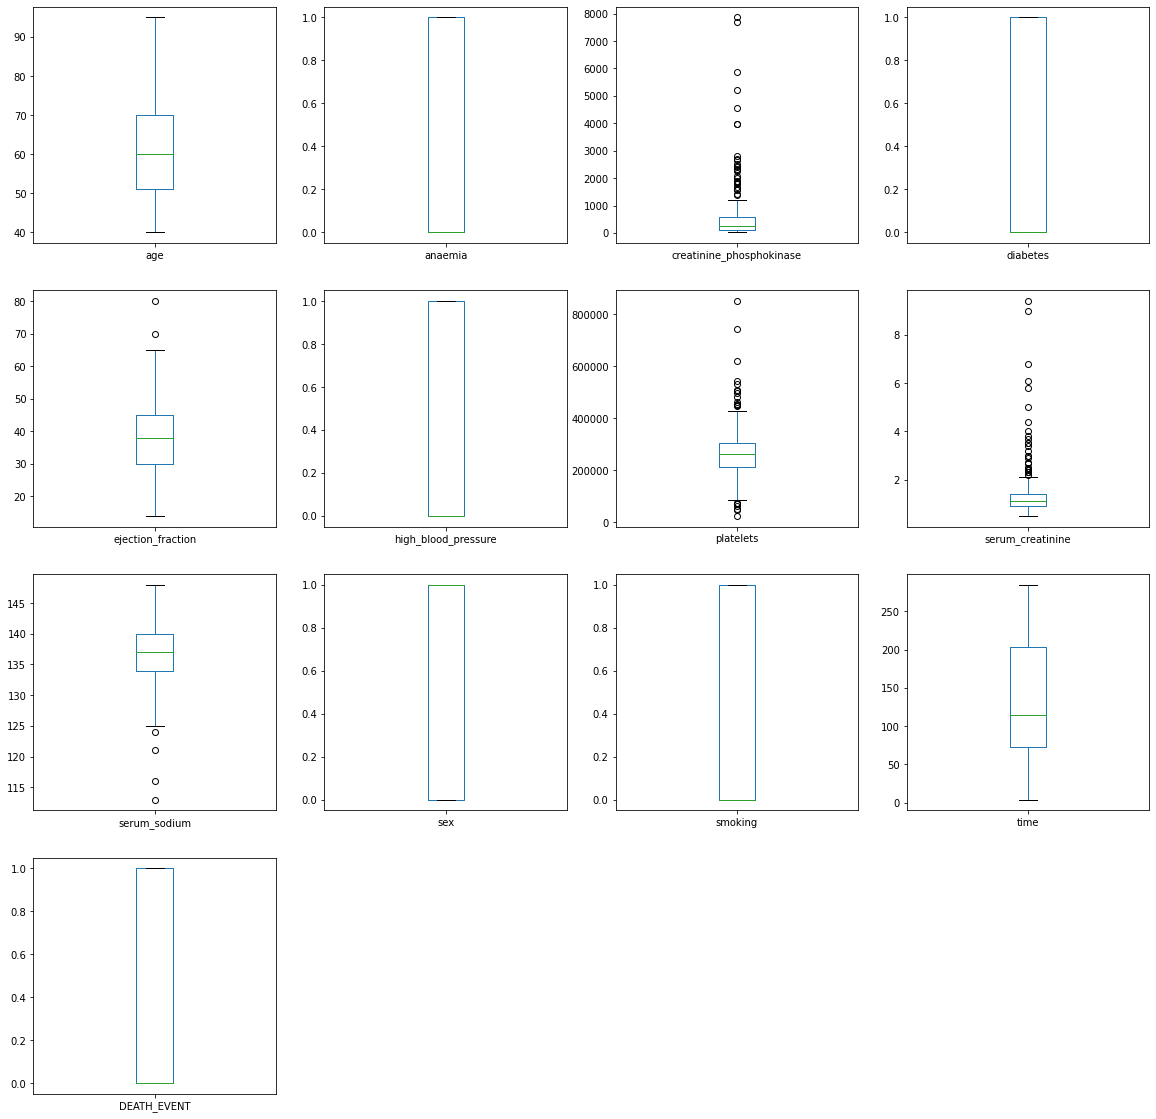

In [ ]:
#For checking the outliers in the dataset we will plot the box plot of each feature.
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

Percentage of Super Senior people lose their life : 72.22222222222221


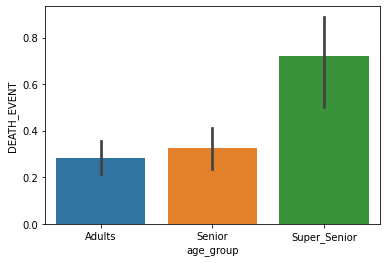

In [ ]:
#For age feature 
bins = [40, 60, 80, np.nan]
labels = ['Adults', 'Senior', 'Super_Senior']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

print('Percentage of Super Senior people lose their life :', data['DEATH_EVENT'][data['age_group']=='Super_Senior'].value_counts(normalize=True)[1]*100)

sns.barplot(x='age_group', y='DEATH_EVENT', data=data)
plt.show()

In [ ]:
#For anaemia
sns.barplot(x='anaemia', y='DEATH_EVENT', data=data)
plt.show()

NameError: ignored

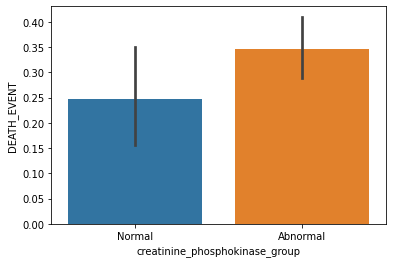

In [ ]:
import numpy as np
bins = [10, 120, np.nan]
labels = ['Normal','Abnormal']
data['creatinine_phosphokinase_group'] = pd.cut(data['creatinine_phosphokinase'], bins=bins, labels=labels)

sns.barplot(x='creatinine_phosphokinase_group', y='DEATH_EVENT', data=data)
plt.show()

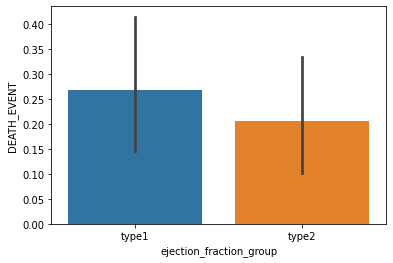

In [ ]:
import seaborn as sns
a=data[data.ejection_fraction>40]
b=data[data.ejection_fraction<40]
bins=[40,50,np.nan]
labels=['type1','type2']
data['ejection_fraction_group']=pd.cut(data['ejection_fraction'],bins=bins,labels=labels)
sns.barplot(x='ejection_fraction_group',y='DEATH_EVENT',data=data)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('dataset.csv')
print('Data read successfully')

Saving dataset.csv to dataset (5).csv
Data read successfully


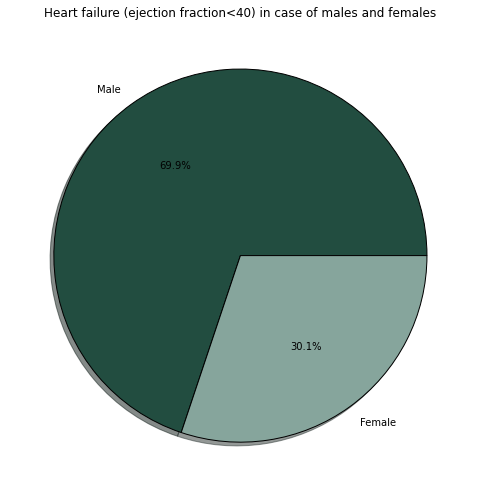

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
dataframe=pd.DataFrame(data,columns=['ejection_fraction','DEATH_EVENT','sex'])
type1=dataframe.loc[(dataframe['ejection_fraction']<40) & (dataframe['sex']==1) & (dataframe['DEATH_EVENT']==1)]
type2=dataframe.loc[(dataframe['ejection_fraction']<40) & (dataframe['sex']==0) & (dataframe['DEATH_EVENT']==1)]
label = ['Male','Female']
data = [len(type1),len(type2)]
fig = plt.figure(figsize =(10, 7))
colors=['#224D40','#86A59C']
plt.pie(data, labels = label,colors=colors,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Heart failure (ejection fraction<40) in case of males and females")
plt.tight_layout()
plt.show()


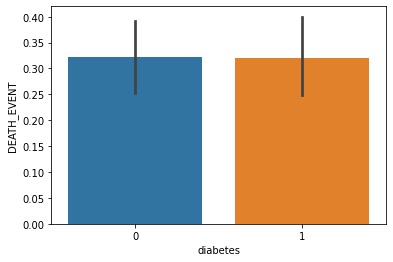

In [ ]:
#For diabetes 
sns.barplot(x='diabetes', y='DEATH_EVENT', data=data)
plt.show()

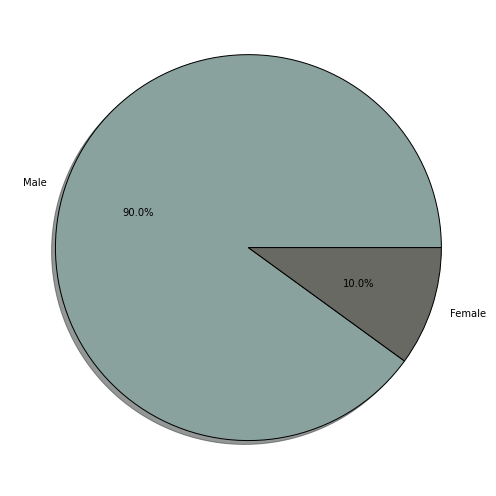

In [ ]:
#smoking male vs female
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
dataframe=pd.DataFrame(data,columns=['smoking','DEATH_EVENT','sex'])
type1=dataframe.loc[(dataframe['smoking']==1) & (dataframe['sex']==1) & (dataframe['DEATH_EVENT']==1)]
type2=dataframe.loc[(dataframe['smoking']==1) & (dataframe['sex']==0) & (dataframe['DEATH_EVENT']==1)]
label = ['Male','Female']
data = [len(type1),len(type2)]
fig = plt.figure(figsize =(10, 7))
colors=['#8AA29E','#686963']
plt.pie(data, labels = label,colors=colors,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.tight_layout()
plt.show()

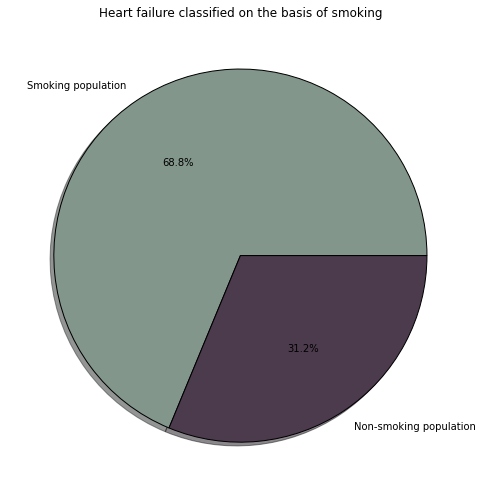

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
dataframe=pd.DataFrame(data,columns=['smoking','DEATH_EVENT','sex'])
type1=dataframe.loc[(dataframe['smoking']==1) & (dataframe['DEATH_EVENT']==1)]
type2=dataframe.loc[(dataframe['smoking']==0) & (dataframe['DEATH_EVENT']==1)]
label = ['Smoking population','Non-smoking population']
data = [len(type2),len(type1)]
fig = plt.figure(figsize =(10, 7))
colors=['#82968C','#4C3B4D']
plt.pie(data, labels = label,colors=colors,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title('Heart failure classified on the basis of smoking')
plt.tight_layout()
plt.show()

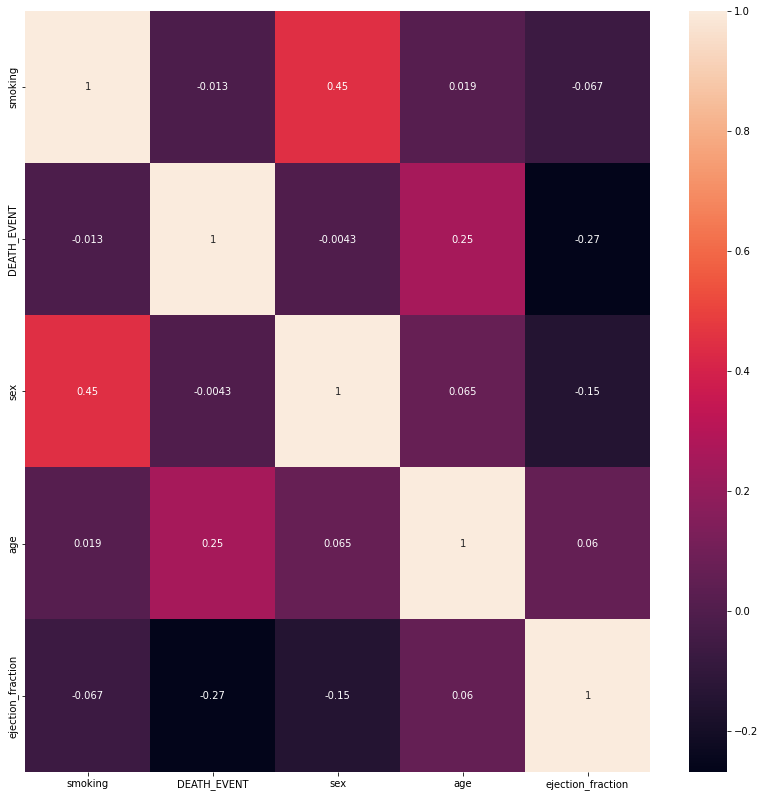

In [ ]:
df=pd.DataFrame(data,columns=['smoking','DEATH_EVENT','sex','age','ejection_fraction'])
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=data.columns,
                   title ="Distribution of PLATELETS Vs DEATH_EVENT", 
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
#Plot between 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


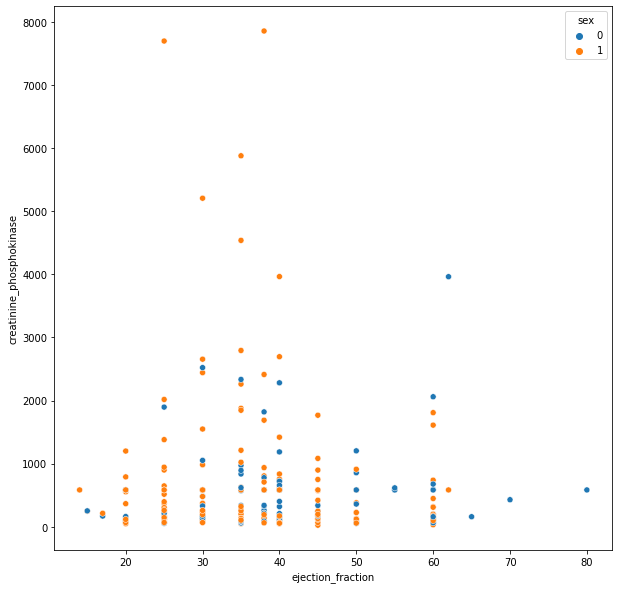

In [ ]:
import numpy
import matplotlib.pyplot as plt
x = data['ejection_fraction']
y = data['creatinine_phosphokinase']
plt.figure(figsize=(10,10))
sns.scatterplot(x,y,hue='sex',data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


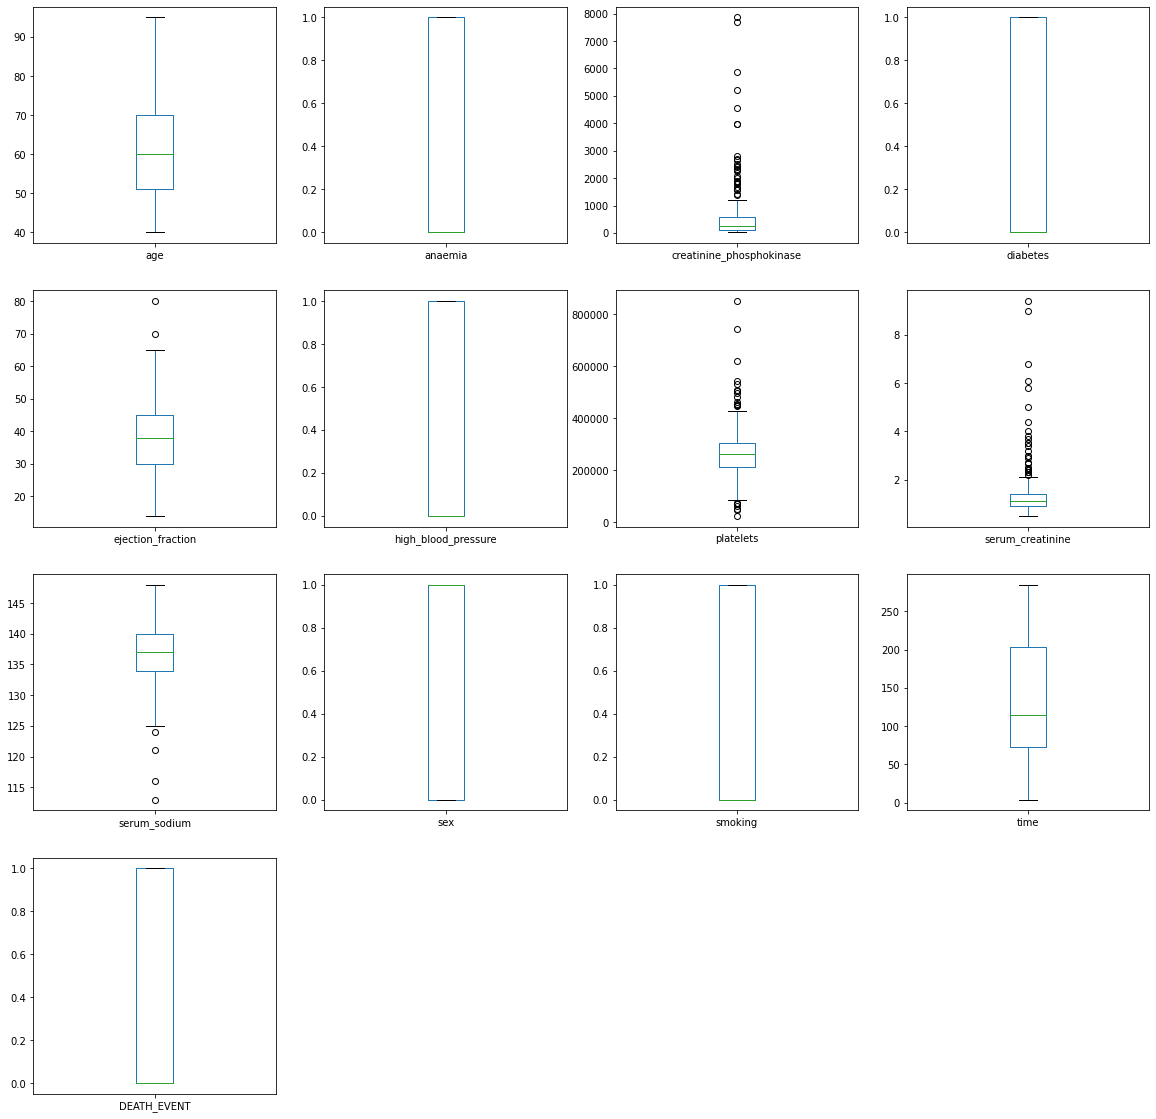

In [ ]:
#For checking the outliers in the dataset we will plot the box plot of each feature.
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

In [ ]:
import plotly.express as px
fig=px.scatter(data,x='age',y='ejection_fraction',color='serum_sodium',size='sex',hover_data=['DEATH_EVENT'])
fig.show()

In [ ]:
fig=px.box(data,x='DEATH_EVENT',y='creatinine_phosphokinase',color='sex')
fig

Text(0, 0.5, 'death')

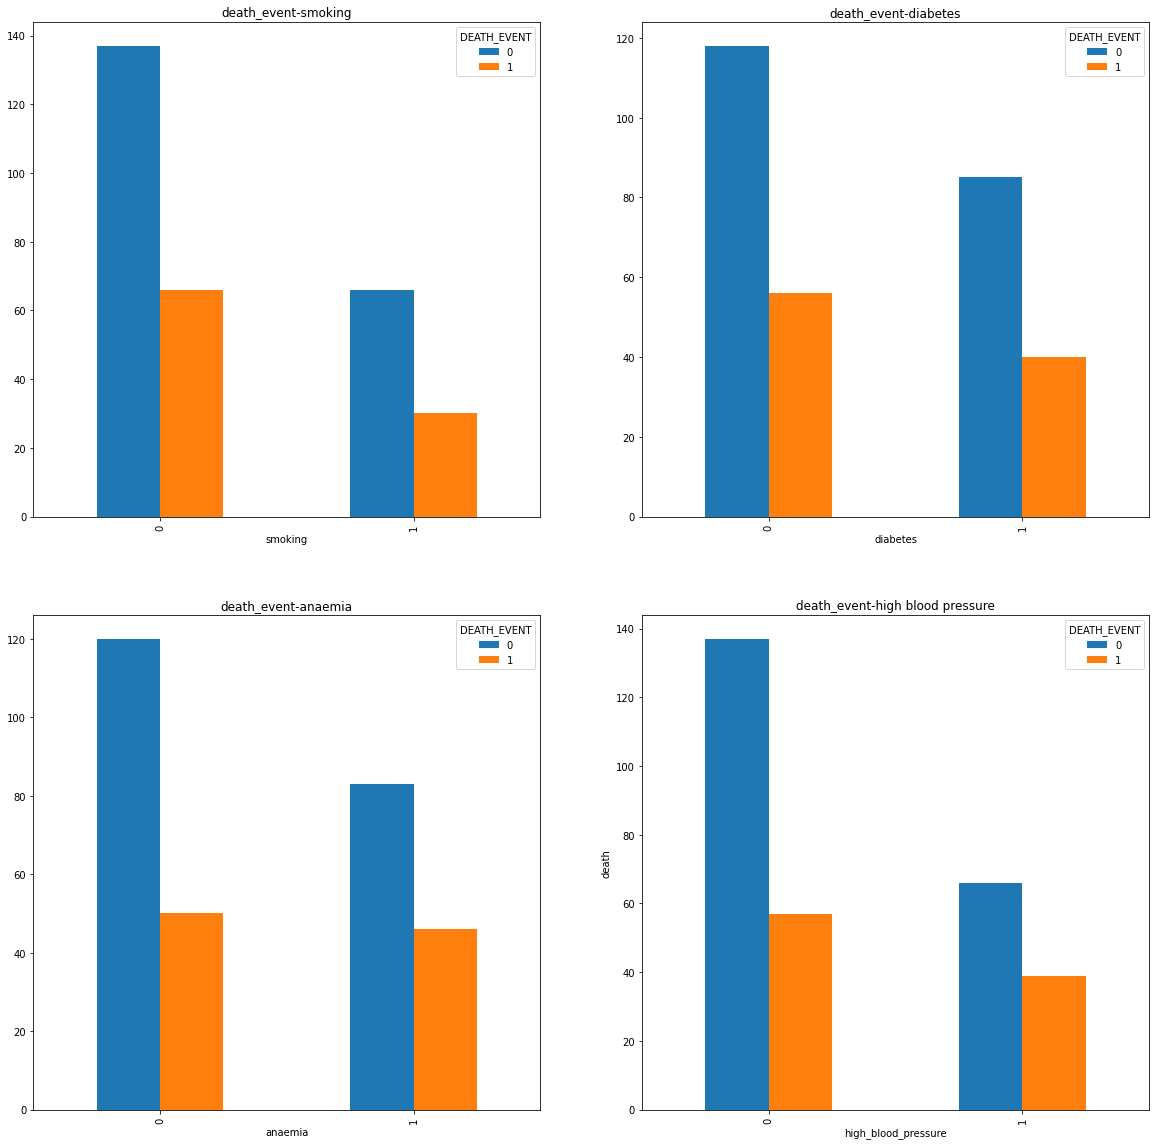

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(20,20))
pd.crosstab(data['smoking'],data['DEATH_EVENT']).plot(kind='bar',ax=axes[0,0],title='death_event-smoking')
plt.ylabel('death')

pd.crosstab(data['diabetes'],data['DEATH_EVENT']).plot(kind='bar',ax=axes[0,1],title='death_event-diabetes')
plt.ylabel('death')


pd.crosstab(data['anaemia'],data['DEATH_EVENT']).plot(kind='bar',ax=axes[1,0],title='death_event-anaemia')
plt.ylabel('death')

pd.crosstab(data['high_blood_pressure'],data['DEATH_EVENT']).plot(kind='bar',ax=axes[1,1],title='death_event-high blood pressure')
plt.ylabel('death')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = data[(data["DEATH_EVENT"]==0) & (data["high_blood_pressure"]==0)]
d2 = data[(data["DEATH_EVENT"]==1) & (data["high_blood_pressure"]==0)]
d3 = data[(data["DEATH_EVENT"]==0) & (data["high_blood_pressure"]==1)]
d4 = data[(data["DEATH_EVENT"]==1) & (data["high_blood_pressure"]==1)]

label1 = ["No High BP","High BP"]
label2 = ['No High BP - Survived','No High BP - Died', "High BP -  Survived", "High BP  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="HIGH BP"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="HIGH BP VS DEATH_EVENT"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="HIGH BP DISTRIBUTION IN THE DATASET \
                  HIGH BP VS DEATH_EVENT",
    annotations=[dict(text='HIGH BP', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='HIGH BP VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

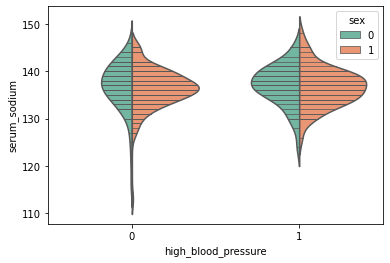

In [ ]:
import seaborn as sns
plot=sns.violinplot(x=data['high_blood_pressure'],y=data['serum_sodium'],hue='sex',data=data,palette='Set2',split=True,scale='count',inner='stick')
plot


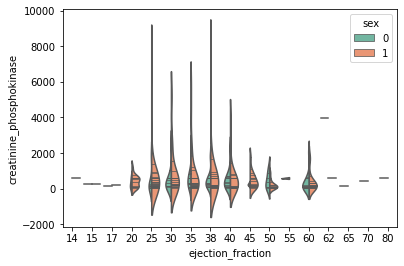

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

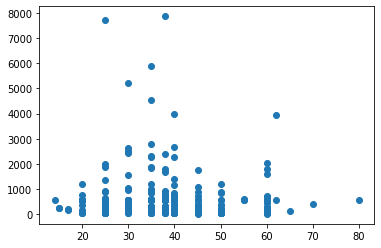

In [ ]:
import seaborn as sns 
sns 

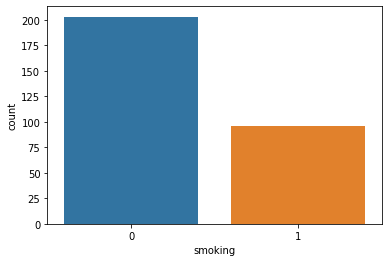

In [ ]:
import seaborn as sns 
sns.countplot(x='smoking',data=data)

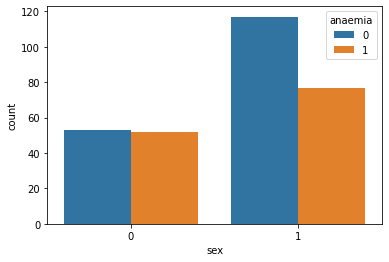

In [ ]:
sns.countplot(x ='sex', hue = "anaemia", data = data)
 
plt.show()

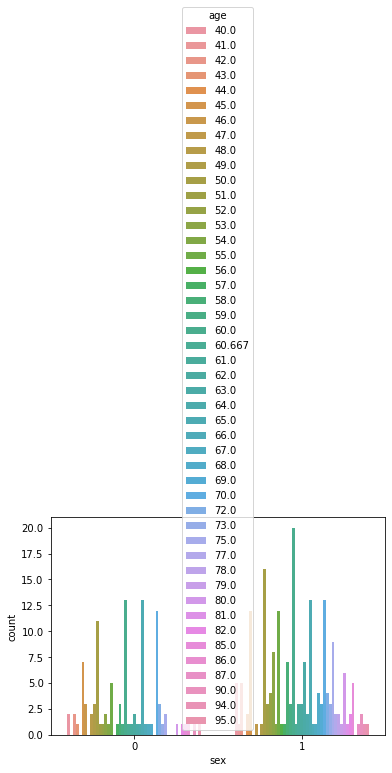

In [ ]:
sns.countplot(x ='sex',hue="age", data = data)

plt.show()

In [ ]:
import seaborn as sns
import plotly.express as px
fig = px.violin(data,x='high_blood_pressure',y='age',color="DEATH_EVENT", box=True, points="all",hover_data=data.columns)
fig.show()